In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tweepy
import csv
import os
import pandas as pd

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import en_core_web_sm

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

# !pip3 install -U spacy
# !python3 -m spacy download en_core_web_sm

from sklearn.metrics import jaccard_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fanyangxin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fanyangxin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
import pickle

#df_raw2 = pd.read_pickle('sah_raw_data_batch2.pkl')
df = pd.read_pickle('sah_raw_data_batch2.pkl')
#df = pd.concat([df_raw1,df_raw2])
df

,tweet_id,tweet_created_at,text,tweet_url,retweet,quote,mentions,hashtags,this_tweet_source,user_id,...,quote_user_screen_name,quote_user_description,quote_user_location,quote_user_verified,quote_user_followers_count,quote_user_friends_count,quote_user_listed_count,quote_user_favourites_count,quote_user_statuses_count,quote_user_profile_image_url_https
0,1375418007514664964,Fri Mar 26 12:03:01 +0000 2021,I told everyone that they were going to start ...,https://twitter.com/BettyKPIX/status/137523857...,True,True,[16948493],[None],"<a href=""https://mobile.twitter.com"" rel=""nofo...",550714708,...,BettyKPIX,@KPIXtv Reporter https://Instagram.com/bett_yu,"San Francisco, CA",True,8176.0,998.0,203.0,8998.0,8555.0,https://pbs.twimg.com/profile_images/692074375...
1,1375418015387316224,Fri Mar 26 12:03:03 +0000 2021,Quantifying hate can be hard: how to price out...,https://www.washingtonpost.com/business/2021/0...,True,False,[14742251],[None],"<a href=""https://mobile.twitter.com"" rel=""nofo...",395857663,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
2,1375418018230980614,Fri Mar 26 12:03:04 +0000 2021,It is yet another honour for #Odisha to co-hos...,None,True,False,"[3489768920, 2238652956]",[Odisha],"<a href=""http://twitter.com/download/android"" ...",1323924750985424896,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
3,1375418038271496194,Fri Mar 26 12:03:09 +0000 2021,You look 23 love.,None,True,True,[42030829],[None],"<a href=""http://twitter.com/download/iphone"" r...",1158117342309748737,...,Bleach_Bae,The Sōsuke Aizen you knew...never existed to b...,Hueco Mundo,False,10986.0,6412.0,52.0,87491.0,45667.0,https://pbs.twimg.com/profile_images/137418425...
4,1375418038787440640,Fri Mar 26 12:03:09 +0000 2021,"Kamala Harris, for years, said she has primari...",None,True,False,[4165642155],[None],"<a href=""http://twitter.com/download/android"" ...",1335272522523275265,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083127,1377202146848874496,Wed Mar 31 10:12:33 +0000 2021,A powerful message against hatred and racism. ...,None,True,True,"[4899304912, 20646711]",[None],"<a href=""http://twitter.com/download/android"" ...",1131096634748620801,...,BTS_twt,Hi ! We are BTS !,None,True,34066434.0,144.0,89825.0,223.0,12561.0,https://pbs.twimg.com/profile_images/131820618...
2083128,1377202147595481091,Wed Mar 31 10:12:33 +0000 2021,Very few people have more influence around the...,None,True,True,"[148945945, 335141638]",[BTSARMY],"<a href=""http://twitter.com/download/android"" ...",43087108,...,BTS_twt,Hi ! We are BTS !,None,True,34066435.0,144.0,89825.0,223.0,12561.0,https://pbs.twimg.com/profile_images/131820618...
2083129,1377202148107116546,Wed Mar 31 10:12:33 +0000 2021,tw//transphobia and abuse\n\nthis has been dea...,https://www.gofundme.com/f/lidias-safety-fund,True,False,[1357658129828249603],[None],"<a href=""http://twitter.com/download/iphone"" r...",4778575975,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
2083130,1377202148677672961,Wed Mar 31 10:12:34 +0000 2021,“I think it's important for us to have these c...,https://trib.al/DNYqHTq,True,False,"[252751061, 390274454]",[None],"<a href=""http://twitter.com/download/iphone"" r...",1262365570940448770,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None


In [5]:
df = df[df['retweet']==False]
df = df.reset_index()
df = df[df['quote']==True]
df

,index,tweet_id,tweet_created_at,text,tweet_url,retweet,quote,mentions,hashtags,this_tweet_source,...,quote_user_screen_name,quote_user_description,quote_user_location,quote_user_verified,quote_user_followers_count,quote_user_friends_count,quote_user_listed_count,quote_user_favourites_count,quote_user_statuses_count,quote_user_profile_image_url_https
1,8,1375418050053279745,Fri Mar 26 12:03:11 +0000 2021,#VirtualVigil,None,False,True,[],[StopAsianHate],"<a href=""http://twitter.com/download/iphone"" r...",...,JoyceTakako,Not pandering to ableists since 2009 #BLM toda...,None,False,3677.0,5000.0,50.0,235871.0,75873.0,https://pbs.twimg.com/profile_images/982987237...
3,16,1375418069456142341,Fri Mar 26 12:03:16 +0000 2021,🤍 “Tight Asian Asshole” 🤍\n\nSpreading my assh...,https://www.manyvids.com/Video/2403743/Tight-A...,False,True,[],[None],"<a href=""http://twitter.com/download/android"" ...",...,ExplicitCherry2,˗ˏˋ http://fancentro.com/explicitcherry ˎˊ˗ ⠀⠀...,🤍 tip me: $explicitcherry2,False,186220.0,71.0,706.0,11343.0,5748.0,https://pbs.twimg.com/profile_images/136132907...
12,51,1375418184333983744,Fri Mar 26 12:03:43 +0000 2021,asian doll is so ... strange https://t.co/YlmI...,None,False,True,[],[None],"<a href=""http://twitter.com/download/iphone"" r...",...,noreaIngeIs,money make me cum,he/they 18,False,992.0,1006.0,11.0,59113.0,21615.0,https://pbs.twimg.com/profile_images/137303988...
13,61,1375418199668326404,Fri Mar 26 12:03:47 +0000 2021,asian doll is so ... strange https://t.co/YlmI...,None,False,True,[],[None],"<a href=""http://twitter.com/download/iphone"" r...",...,noreaIngeIs,money make me cum,he/they 18,False,992.0,1006.0,11.0,59113.0,21615.0,https://pbs.twimg.com/profile_images/137303988...
20,83,1375418231448559616,Fri Mar 26 12:03:55 +0000 2021,So i've been reading up on Asian American hist...,None,False,True,[],[None],"<a href=""http://twitter.com/download/iphone"" r...",...,mot427,"""We must not *submit* to racism and we must fi...",626,False,2111.0,299.0,26.0,113375.0,72960.0,https://pbs.twimg.com/profile_images/137266225...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494598,2083050,1377202053085233157,Wed Mar 31 10:12:11 +0000 2021,"@zorawarrr Brilliant athlete. But to me, the j...",None,False,True,[],[None],"<a href=""http://twitter.com/download/android"" ...",...,DrWatson071,#Cricket | #BabarAzam | #ViratKholi | #Seb5 |\...,"Honslow, Borough of London",False,149.0,588.0,0.0,3536.0,3248.0,https://pbs.twimg.com/profile_images/136967969...
494599,2083053,1377202056629346307,Wed Mar 31 10:12:12 +0000 2021,#StopAsianHate\n#StopAAPIHate https://t.co/mOm...,None,False,True,[335141638],[None],"<a href=""http://twitter.com/download/android"" ...",...,BTS_twt,Hi ! We are BTS !,None,True,34066431.0,144.0,89825.0,223.0,12561.0,https://pbs.twimg.com/profile_images/131820618...
494600,2083061,1377202066683224065,Wed Mar 31 10:12:14 +0000 2021,Disproportionate rates of school exclusion. Di...,None,False,True,[],[None],"<a href=""http://twitter.com/download/iphone"" r...",...,SLCT2015,Director Jesuit Refugee Service UK @JRSUK. Mus...,"London, England",False,2370.0,1677.0,23.0,6858.0,4310.0,https://pbs.twimg.com/profile_images/136468522...
494604,2083076,1377202086111240196,Wed Mar 31 10:12:19 +0000 2021,The NYPD Hate Crimes Unit will investigate the...,https://bit.ly/2QPuLvL,False,True,"[803694179079458816, 1349149096909668363]",[None],"<a href=""http://twitter.com/download/android"" ...",...,Complex,Making Culture Pop.,New York,True,2502328.0,762.0,8201.0,29811.0,355224.0,https://pbs.twimg.com/profile_images/839858358...


In [6]:
df['quote_text']

1                                             #VirtualVigil
3         🤍 “Tight Asian Asshole” 🤍\n\nSpreading my assh...
12        asian doll is so ... strange https://t.co/YlmI...
13        asian doll is so ... strange https://t.co/YlmI...
20        So i've been reading up on Asian American hist...
                                ...                        
494598    @zorawarrr Brilliant athlete. But to me, the j...
494599    #StopAsianHate\n#StopAAPIHate https://t.co/mOm...
494600    Disproportionate rates of school exclusion. Di...
494604    The NYPD Hate Crimes Unit will investigate the...
494605    It's OKAsia's🎧Request Time!\n\nSupport your fa...
Name: quote_text, Length: 139812, dtype: object

In [9]:
df['text']

1                                             #VirtualVigil
3         🤍 “Tight Asian Asshole” 🤍\n\nSpreading my assh...
12        asian doll is so ... strange https://t.co/YlmI...
13        asian doll is so ... strange https://t.co/YlmI...
20        So i've been reading up on Asian American hist...
                                ...                        
494598    @zorawarrr Brilliant athlete. But to me, the j...
494599    #StopAsianHate\n#StopAAPIHate https://t.co/mOm...
494600    Disproportionate rates of school exclusion. Di...
494604    The NYPD Hate Crimes Unit will investigate the...
494605    It's OKAsia's🎧Request Time!\n\nSupport your fa...
Name: text, Length: 139812, dtype: object

In [3]:
df = df[['screen_name','text']]
df

,screen_name,text
0,gtrxman,@trabreee Given the conservative nature and ti...
1,ser_robison,Square Enix presenting two new games where the...
2,ChristineYH,"Sadly, during the COVID-19 pandemic, the numbe..."
3,djaziriya,you shouldnt feel obligated to share resources...
4,sarahxnala,"""what can i do to help #StopAsianHate?"" a thre..."
...,...,...
2909659,aweaver31873379,"@MrAndyNgo @DineshDSouza Oh WOW look everyone,..."
2909660,snobdughetto,so zara is gonna sell traditional uyghur &amp;...
2909661,ErkanNaln,🐳🌟🦋AsiAn\n SeCrEtS🦋🌟🐳 https://t.co/PjQXaQPWVA
2909662,Ocean16931376,Any followers (institutions and individuals) w...


In [3]:
# remove the hashtags, mentions and unwanted characters from the tweet texts
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

clean_tweets = clean_text(df, 'text')
clean_tweets.head()

,tweet_id,tweet_created_at,text,tweet_url,retweet,quote,mentions,hashtags,this_tweet_source,user_id,...,quote_user_screen_name,quote_user_description,quote_user_location,quote_user_verified,quote_user_followers_count,quote_user_friends_count,quote_user_listed_count,quote_user_favourites_count,quote_user_statuses_count,quote_user_profile_image_url_https
0,1372666939638681603,Thu Mar 18 21:51:15 +0000 2021,given the conservative nature and tight famil...,None,False,False,[573681712],[None],"<a href=""https://mobile.twitter.com"" rel=""nofo...",371535654,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
1,1372666939898699778,Thu Mar 18 21:51:16 +0000 2021,square enix presenting two new games where the...,None,True,False,[2478263302],[None],"<a href=""http://twitter.com/download/iphone"" r...",2925265201,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
2,1372666940511031296,Thu Mar 18 21:51:16 +0000 2021,sadly during the covid19 pandemic the number o...,None,True,False,[15868178],[None],"<a href=""http://twitter.com/download/iphone"" r...",260284794,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
3,1372666941282869255,Thu Mar 18 21:51:16 +0000 2021,you shouldnt feel obligated to share resources...,None,True,False,[1299106024163627019],[None],"<a href=""http://twitter.com/download/android"" ...",1348409465385725954,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
4,1372666941182197767,Thu Mar 18 21:51:16 +0000 2021,what can i do to help stopasianhate a thread w...,None,True,False,[1134639749438722048],[StopAsianHate],"<a href=""http://twitter.com/download/iphone"" r...",854830153058439169,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None


In [4]:
#remove stopwords, punctuations, lemmatize and tokenize word
# nlp = spacy.load("en_core_web_sm")   #working with english only, no support for swahili
import nltk
nltk.download('wordnet')
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation) #already taken care of with the cleaning function.
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

            
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
#     for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


            
df.text = df.text.apply(furnished)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fanyangxin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
df

,tweet_id,tweet_created_at,text,tweet_url,retweet,quote,mentions,hashtags,this_tweet_source,user_id,...,quote_user_screen_name,quote_user_description,quote_user_location,quote_user_verified,quote_user_followers_count,quote_user_friends_count,quote_user_listed_count,quote_user_favourites_count,quote_user_statuses_count,quote_user_profile_image_url_https
0,1372666939638681603,Thu Mar 18 21:51:15 +0000 2021,given conservative nature tight family value a...,None,False,False,[573681712],[None],"<a href=""https://mobile.twitter.com"" rel=""nofo...",371535654,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
1,1372666939898699778,Thu Mar 18 21:51:16 +0000 2021,square enix presenting two new game protagonis...,None,True,False,[2478263302],[None],"<a href=""http://twitter.com/download/iphone"" r...",2925265201,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
2,1372666940511031296,Thu Mar 18 21:51:16 +0000 2021,sadly covid19 pandemic number incident antiasi...,None,True,False,[15868178],[None],"<a href=""http://twitter.com/download/iphone"" r...",260284794,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
3,1372666941282869255,Thu Mar 18 21:51:16 +0000 2021,shouldnt feel obligated share resource protect...,None,True,False,[1299106024163627019],[None],"<a href=""http://twitter.com/download/android"" ...",1348409465385725954,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
4,1372666941182197767,Thu Mar 18 21:51:16 +0000 2021,help stopasianhate thread information resource...,None,True,False,[1134639749438722048],[StopAsianHate],"<a href=""http://twitter.com/download/iphone"" r...",854830153058439169,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909659,1375379047312719876,Fri Mar 26 09:28:12 +0000 2021,oh wow look everyone another white supremacist...,None,False,False,"[2835451658, 91882544]",[None],"<a href=""https://mobile.twitter.com"" rel=""nofo...",1368204112039448578,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
2909660,1375379049615388672,Fri Mar 26 09:28:13 +0000 2021,zara gonna sell traditional uyghur amp central...,None,True,False,[1576992128],[None],"<a href=""http://twitter.com/download/android"" ...",752493071485534208,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
2909661,1375379049124597760,Fri Mar 26 09:28:13 +0000 2021,asian secret,None,True,False,[1222639589501726720],[None],"<a href=""http://twitter.com/download/android"" ...",1528129160,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
2909662,1375379052630974467,Fri Mar 26 09:28:14 +0000 2021,follower institution individual want help buil...,None,True,False,[2279301618],[None],"<a href=""http://twitter.com/download/android"" ...",1167611353881645056,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None


Define set of words

In [35]:
Anti_asian_hate_crimes = ''' Atlanta anti-Asian hate crime '''

Support_Asian = ''' donate stand help support  '''

Privilege = ''' White supremacy privilege whiteness '''

Past_anti_Asian_discrimination = '''stereotypes fetishizing historic discrimination '''

Black_Asian_relationship = '''Black Asian Conflict Solidarity'''

Biased_media = ''' biased media misspel white'''

Politics = ''' Trump Biden democrat republican '''

Asian_Self_defence = ''' buy guns belong Proud'''

Not_support_Asian = '''Reject not racially driven'''

Gun = ''' Gun violence Massing shooting '''

Asian_culture = '''food movies TV series'''



# Tokenizing and removing stop words from the sets.

In [36]:
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

# clean the set of words
            
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)

In [37]:
anti_asian_hate_crimes = furnished(Anti_asian_hate_crimes)
Support_Asian = furnished(Support_Asian)
Privilege = furnished(Privilege)
Past_anti_Asian_discrimination = furnished(Past_anti_Asian_discrimination)
Black_Asian = furnished(Black_Asian_relationship)
Biased_media = furnished(Biased_media)
Politics = furnished(Politics)
Asian_Self_defence = furnished(Asian_Self_defence)
Not_support_Asian = furnished(Not_support_Asian)
Gun = furnished(Gun)
Asian_culture = furnished(Asian_culture)

# Vectorizing and Standadization

In [38]:
def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = TfidfVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [39]:
anti_asian_hate_crimes_vec = get_vectors(Anti_asian_hate_crimes)
Support_Asian_vec = get_vectors(Support_Asian)
Privilege_vec = get_vectors(Privilege)
Past_anti_Asian_discrimination_vec = get_vectors(Past_anti_Asian_discrimination)
Black_Asian_vec = get_vectors(Black_Asian_relationship)
Biased_media_vec = get_vectors(Biased_media)
Politics_vec = get_vectors(Politics)
Asian_Self_defence_vec = get_vectors(Asian_Self_defence)
Not_support_Asian_vec = get_vectors(Not_support_Asian)
Gun_vec = get_vectors(Gun)
Asian_culture_vec = furnished(Asian_culture)

/Users/fanyangxin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass input=[' Atlanta anti-Asian hate crime '] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/fanyangxin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass input=['donate stand help support'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/fanyangxin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass input=['white supremacy privilege whiteness'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/fanyangxin/opt/anaconda3/lib/python3.8/site-packages/skl

In [40]:
Not_support_Asian_vec

array([[0.57735027, 0.57735027, 0.57735027]])

In [41]:
## Vectorizing the tweets
tv=TfidfVectorizer()
# tweets_bowl = tweets_bowl.tweets.apply(get_vectors)
# tweets_bowl.head()
tfidf_df =tv.fit_transform(df.text)

# Jaccard Similarity

In [42]:
def jaccard_similarity(query, document): 
    a = set(query.split()) 
    b = set(document.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

# jaccard_score(socialvector, economic_vector)

#for similarity of 1 and 2 of column1
# jaccard_similarity('dog lion a dog','dog is cat')


def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores

In [43]:
jaccard_similarity('Asian hate', 'Asian')

0.5

In [44]:
# Anti_asian_hate_crimes scores
ASHC_scores = get_scores(anti_asian_hate_crimes, df.text.to_list())
ASHC_scores[-10:]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.0, 0.0, 0.0, 0.0]

In [45]:
Asian_culture

'food movie tv series'

In [46]:
# Support_Asian scores
SA_scores = get_scores(Support_Asian, df.text.to_list())
SA_scores[-10:]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.0]

In [47]:
# Privilege
Privilege_scores = get_scores(Privilege, df.text.to_list())
Privilege_scores[-10:]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.07692307692307693, 0.0, 0.0, 0.0, 0.0]

In [48]:
# Past_anti_Asian_discrimination
PAAD_scores = get_scores(Past_anti_Asian_discrimination, df.text.to_list())
PAAD_scores[-10:]

[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [49]:
# Black_Asian
BA_scores = get_scores(Black_Asian, df.text.to_list())
BA_scores[-10:]

[0.04,
 0.2,
 0.03571428571428571,
 0.0625,
 0.05555555555555555,
 0.0,
 0.058823529411764705,
 0.2,
 0.0,
 0.0]

In [50]:
# Biased_media
BM_scores = get_scores(Biased_media, df.text.to_list())
BM_scores[-10:]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.07692307692307693, 0.0, 0.0, 0.0, 0.0]

In [51]:
# Politics
Politics_scores = get_scores(Politics, df.text.to_list())
Politics_scores[-10:]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [52]:
# Asian_Self_defence
ASD_scores = get_scores(Asian_Self_defence, df.text.to_list())
ASD_scores[-10:]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [53]:
# Not_support_Asian
NSA_scores = get_scores(Not_support_Asian, df.text.to_list())
NSA_scores[-10:]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [54]:
# Gun
G_scores = get_scores(Gun, df.text.to_list())
G_scores[-10:]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [55]:
# Asian_culture 
AC_scores = get_scores(Asian_culture, df.text.to_list())
AC_scores[-10:]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [56]:
'''new df with names, and the jaccard scores for each group'''

data  = {'names':df.screen_name.to_list(), 'text': df.text.to_list(),'anti_Asian_hate_crime':ASHC_scores,
         'Support_Asian': SA_scores, 'Privilege':Privilege_scores, 'Past_anti_Asian_discrimination':PAAD_scores,
         'Black_Asian': BA_scores, 'Biased_media':BM_scores, 'Politics':Politics_scores, 'Asian_Self_defence':ASD_scores, 
         'Not_support_Asian':NSA_scores,'Gun':G_scores, 'Asian_culture': AC_scores}

scores_df = pd.DataFrame(data)
scores_df.head(100)

,names,text,anti_Asian_hate_crime,Support_Asian,Privilege,Past_anti_Asian_discrimination,Black_Asian,Biased_media,Politics,Asian_Self_defence,Not_support_Asian,Gun,Asian_culture
0,gtrxman,given conservative nature tight family value a...,0.000000,0.000000,0.000000,0.0,0.058824,0.000000,0.058824,0.0,0.0,0.000000,0.0
1,ser_robison,square enix presenting two new game protagonis...,0.000000,0.000000,0.000000,0.0,0.062500,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,ChristineYH,sadly covid19 pandemic number incident antiasi...,0.035714,0.000000,0.000000,0.0,0.035714,0.000000,0.000000,0.0,0.0,0.074074,0.0
3,djaziriya,shouldnt feel obligated share resource protect...,0.000000,0.041667,0.000000,0.0,0.041667,0.000000,0.000000,0.0,0.0,0.000000,0.0
4,sarahxnala,help stopasianhate thread information resource...,0.000000,0.100000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,minipeachess,thank guy using platform spread awareness curr...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
96,chris_parillo,ranting racist rhetoric republican asianameric...,0.076923,0.037037,0.000000,0.0,0.000000,0.000000,0.076923,0.0,0.0,0.000000,0.0
97,alburnham,white men glorify lynching justify bad behavio...,0.000000,0.000000,0.071429,0.0,0.000000,0.071429,0.000000,0.0,0.0,0.000000,0.0
98,KOANDMIKA,cause anger towards asian american one person ...,0.000000,0.000000,0.000000,0.0,0.043478,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [57]:
'''Actual assigning of classes to the tweets'''

def get_clusters(l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11):
    anti_asian_hate_crimes = []
    Support_Asian = []
    Privilege = []
    Past_anti_Asian_discrimination = []
    Black_Asian = []
    Biased_media = []
    Politics = []
    Asian_Self_defence = []
    Not_support_Asian = []
    Gun = []
    Asian_culture = []

    for a, b, c, d, e, f, g, h, i, j, k in zip(l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11):
        m = max(a, b, c, d, e, f, g, h, i, j)
        if m == a:
            anti_asian_hate_crimes.append(1)
        else:
            anti_asian_hate_crimes.append(0)
        if m == b:
            Support_Asian.append(1)
        else:
            Support_Asian.append(0)        
        if m == c:
            Privilege.append(1)
        else:
            Privilege.append(0)  
        if m == d:
            Past_anti_Asian_discrimination.append(1)
        else:
            Past_anti_Asian_discrimination.append(0)   
        if m == e:
            Black_Asian.append(1)
        else:
            Black_Asian.append(0) 
        if m == f:
            Biased_media.append(1)
        else:
            Biased_media.append(0) 
        if m == g:
            Politics.append(1)
        else:
            Politics.append(0) 
        if m == h:
            Asian_Self_defence.append(1)
        else:
            Asian_Self_defence.append(0) 
        if m == i:
            Not_support_Asian.append(1)
        else:
            Not_support_Asian.append(0) 
        if m == j:
            Gun.append(1)
        else:
            Gun.append(0)         
        if m == k:
            Asian_culture.append(1)
        else:
            Asian_culture.append(0)
    return anti_asian_hate_crimes, Support_Asian, Privilege, Past_anti_Asian_discrimination, Black_Asian, Biased_media, Politics, Asian_Self_defence, Not_support_Asian, Gun, Asian_culture




In [58]:
l1 = scores_df.anti_Asian_hate_crime.to_list()
l2 = scores_df.Support_Asian.to_list()
l3 = scores_df.Privilege.to_list()
l4 = scores_df.Past_anti_Asian_discrimination.to_list()
l5 = scores_df.Black_Asian.to_list()
l6 = scores_df.Biased_media.to_list()
l7 = scores_df.Politics.to_list()
l8 = scores_df.Asian_Self_defence.to_list()
l9 = scores_df.Not_support_Asian.to_list()
l10 = scores_df.Gun.to_list()
l11 = scores_df.Asian_culture.to_list()


anti_asian_hate_crimes, Support_Asian, Privilege, Past_anti_Asian_discrimination, Black_Asian, Biased_media, Politics, Asian_Self_defence, Not_support_Asian, Gun, Asian_culture = get_clusters(l1, l2, l3, l4, l5, l6, l7, l8, l9, l10,l11)




In [59]:
data = {'name': scores_df.names.to_list(), 'text': scores_df.text.to_list(),'Hate crime':anti_asian_hate_crimes, 'Support':Support_Asian, 'Privilege':Privilege, 
        'Historic racism': Past_anti_Asian_discrimination, 'Black_Asian': Black_Asian, 'Biased_media': Biased_media, 
        'Politics': Politics, 'Asian_Self_defence': Asian_Self_defence, 'Not_support_Asian': Not_support_Asian, 'Gun': Gun,
        'Asian_culture': Asian_culture}
cluster_df = pd.DataFrame(data)
cluster_df.head(5)

,name,text,Hate crime,Support,Privilege,Historic racism,Black_Asian,Biased_media,Politics,Asian_Self_defence,Not_support_Asian,Gun,Asian_culture
0,gtrxman,given conservative nature tight family value a...,0,0,0,0,1,0,1,0,0,0,0
1,ser_robison,square enix presenting two new game protagonis...,0,0,0,0,1,0,0,0,0,0,0
2,ChristineYH,sadly covid19 pandemic number incident antiasi...,0,0,0,0,0,0,0,0,0,1,0
3,djaziriya,shouldnt feel obligated share resource protect...,0,1,0,0,1,0,0,0,0,0,0
4,sarahxnala,help stopasianhate thread information resource...,0,1,0,0,0,0,0,0,0,0,0


In [60]:
cluster_df['text'][0]

'given conservative nature tight family value asian culture dont understand block generally vote democrat'

# Clustered DF

In [61]:
pivot_clusters = cluster_df.groupby(['name']).sum()
pivot_clusters['Hate crime'] = pivot_clusters['Hate crime'].astype(int)
pivot_clusters['Support'] = pivot_clusters['Support'].astype(int)
pivot_clusters['Privilege'] = pivot_clusters['Privilege'].astype(int)
pivot_clusters['Historic racism'] = pivot_clusters['Historic racism'].astype(int)
pivot_clusters['Black_Asian'] = pivot_clusters['Black_Asian'].astype(int)
pivot_clusters['Biased_media'] = pivot_clusters['Biased_media'].astype(int)
pivot_clusters['Politics'] = pivot_clusters['Politics'].astype(int)
pivot_clusters['Asian_Self_defence'] = pivot_clusters['Asian_Self_defence'].astype(int)
pivot_clusters['Not_support_Asian'] = pivot_clusters['Not_support_Asian'].astype(int)
pivot_clusters['Gun'] = pivot_clusters['Gun'].astype(int)
pivot_clusters['Asian_culture'] = pivot_clusters['Asian_culture'].astype(int)

pivot_clusters['total'] = pivot_clusters['Hate crime'] + pivot_clusters['Support'] + pivot_clusters['Privilege'] + pivot_clusters['Historic racism'] + pivot_clusters['Black_Asian'] + pivot_clusters['Biased_media']+ pivot_clusters['Politics'] + pivot_clusters['Asian_Self_defence'] + pivot_clusters['Not_support_Asian']+ pivot_clusters['Gun']+pivot_clusters['Asian_culture'] 
pivot_clusters.loc["Total"] = pivot_clusters.sum()  #add a totals row
print(pivot_clusters.shape)
pivot_clusters.tail()



(1349423, 12)


,Hate crime,Support,Privilege,Historic racism,Black_Asian,Biased_media,Politics,Asian_Self_defence,Not_support_Asian,Gun,Asian_culture,total
name,,,,,,,,,,,,
zzzzzooozzzzzo,2,2,3,2,2,2,2,2,2,2,2,23
zzzzzz47847066,0,0,0,0,1,0,0,0,0,0,0,1
zzzzzzatiiiiii1,0,0,0,0,1,0,0,0,0,0,0,1
zzzzzzzzzzzzjj,1,1,1,1,1,1,1,1,1,1,1,11
Total,1217827,907250,844267,648103,2139963,814334,691171,664354,602307,856830,617864,10004270


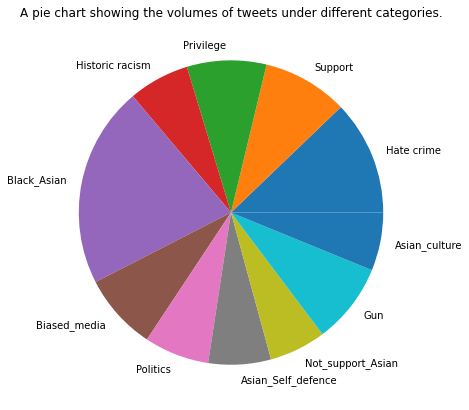

In [62]:
fig = plt.figure(figsize =(10, 7)) 
a = pivot_clusters.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('A pie chart showing the volumes of tweets under different categories.')
plt.show()